In [5]:
import numpy as np
import scipy
import scipy.stats as st
from matplotlib import pyplot as plt

In [6]:
import os
os.getcwd()

'C:\\Users\\Ti\\Documents\\GitHub\\Lilith-Run2database\\Validations'

## CMS-HIG-16-040

In [8]:
# --- experimental input from Fig. 17 ---
# --- order: ggH, VBF, VH, ttH ---

Hgamgam_obs = np.array([1.1,0.8,2.4,2.2])
Hgamgam_err_pos = np.array([[0.2,0.6,1.1,0.9]])
Hgamgam_err_neg = np.array([[0.18,0.5,1.0,0.8]])
Hgamgam_err = (Hgamgam_err_pos+Hgamgam_err_neg)/2  # need symmetric errors
#Hgamgam_err = Hgamgam_err_pos

In [9]:
# --- correlation matrix from "Additional Figure 2" ---
# --- note order: ggH, VBF, VH, ttH ---

Hgamgam_corr = np.array([[1,-0.3,-0.2,0.04],
                   [-0.3,1,0.04,0],
                   [-0.2,0.04,1,-0.1],
                   [0.04,0,-0.1,1]])
print(Hgamgam_corr)

[[ 1.   -0.3  -0.2   0.04]
 [-0.3   1.    0.04  0.  ]
 [-0.2   0.04  1.   -0.1 ]
 [ 0.04  0.   -0.1   1.  ]]


In [19]:
# --- compute covariance matrix ---
def Vf(z):
    V1 = Hgamgam_err_pos * Hgamgam_err_neg 
    V1e = Hgamgam_err_pos - Hgamgam_err_neg 
    V1f = V1 + V1e*(z-Hgamgam_obs)
    return V1f

def Hgamgam_cov(z):
    Hgamgam_cov = np.linalg.inv(Vf(z)*Hgamgam_corr*Vf(z).T)
    return Hgamgam_cov

print(Hgamgam_cov(np.array([1.1,0.8,2.4,2.2])))

[[  8.82695058e+02   3.09882764e+01   5.37781177e+00  -9.43779986e-01]
 [  3.09882764e+01   1.22169854e+01   6.61611138e-02  -5.18686048e-02]
 [  5.37781177e+00   6.61611138e-02   8.68909840e-01   1.21994491e-01]
 [ -9.43779986e-01  -5.18686048e-02   1.21994491e-01   1.94953795e+00]]


In [2]:
# --- Test: -2 log Like at 1d best fit and for SM ---

print('chi^2(1d-best) = ', -2*st.multivariate_normal.logpdf(Hgamgam_obs, mean=Hgamgam_obs, cov=Hgamgam_cov))
print('chi^2(SM) = ', -2*st.multivariate_normal.logpdf(Hgamgam_obs, mean=[1,1,1,1], cov=Hgamgam_cov))

NameError: name 'st' is not defined

In [24]:
# --- determine ggH+ttH and VBF+VH best fit as weighted mean values ---

w0 = 1/Hgamgam_err_pos[0][0]**2
w1 = 1/Hgamgam_err_pos[0][1]**2
w2 = 1/Hgamgam_err_pos[0][2]**2
w3 = 1/Hgamgam_err_pos[0][3]**2

ggH_best = (w0*Hgamgam_obs[0] + w3*Hgamgam_obs[3])/(w0+w3)
VVH_best = (w1*Hgamgam_obs[1] + w2*Hgamgam_obs[2])/(w1+w2)

Hgamgam_BM = np.array([ggH_best,VVH_best,VVH_best,ggH_best])
         
print('ggH+ttH mean = ', ggH_best)
print('VBF+VH mean =  ', VVH_best)

ggH+ttH mean =  1.15176470588
VBF+VH mean =   1.16687898089


In [17]:
# --- once more: -2 log Likes ---
print('chi^2(obs,BM) = ',-2*st.multivariate_normal.logpdf(Hgamgam_obs, mean=Hgamgam_BM, cov=Hgamgam_cov))
print('chi^2(BM,BM)  = ',-2*st.multivariate_normal.logpdf(Hgamgam_BM, mean=Hgamgam_BM, cov=Hgamgam_cov))

chi^2(obs,BM) =  6.278636893848375
chi^2(BM,BM)  =  2.4607394022118436


In [19]:
# --- define chi^2 function as -2 log L1/L0, reference point is Hgamgam_BM ---
def chi2Gamgam(x,y):
    logL0 = st.multivariate_normal.logpdf(Hgamgam_obs, mean=Hgamgam_BM, cov=Hgamgam_cov)
    logL1 = st.multivariate_normal.logpdf(Hgamgam_obs, mean=np.array([x,y,y,x]), cov=Hgamgam_cov)
    return -2*(logL1-logL0)

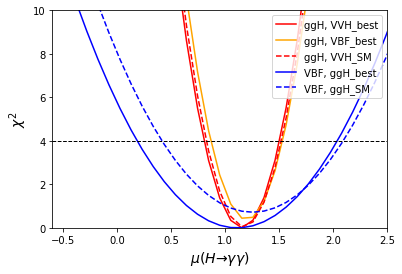

In [20]:
# --- show behaviour in 1d ---

x = np.linspace(-1, 3, 40, endpoint = True)

fig = plt.figure()
plt.plot( x, [ chi2Gamgam(i,VVH_best) for i in x ], c='r', ls='-', label = 'ggH, VVH_best')
plt.plot( x, [ chi2Gamgam(i,Hgamgam_obs[1]) for i in x ], c='orange', ls='-', label = 'ggH, VBF_best')
plt.plot( x, [ chi2Gamgam(i,1) for i in x ], c='r', ls='--', label = 'ggH, VVH_SM')
plt.plot( x, [ chi2Gamgam(ggH_best,i) for i in x ],  c='b', ls='-', label = 'VBF, ggH_best')
plt.plot( x, [ chi2Gamgam(1,i) for i in x ],  c='b', ls='--', label = 'VBF, ggH_SM')
plt.plot([-0.6,2.5], [4,4], c='k', ls='--', lw=1)  
plt.xlim([-0.6, 2.5])
plt.ylim([0, 10])
plt.xlabel(r'$\mu(H\to\gamma\gamma)$',fontsize=14)
plt.ylabel(r'$\chi^2$',fontsize=14)
plt.legend(loc='upper right')
plt.axis(aspect=1)
plt.show()

In [26]:
# --- make 2d chi^2 map for mu(ggH+ttH) vs mu(VBF+VH) ---

x = np.linspace(0, 2, 100, endpoint = True)
y = np.linspace(0, 3, 100, endpoint = True)
xi, yi = np.meshgrid(x, y)

Lxy=[]
for xj,yj in zip(xi,yi):
    tmp=[]
    for x_,y_ in zip(xj,yj):
        tmp.append(chi2Gamgam(x_,y_))
    Lxy.append(tmp)

In [21]:
# --- read digitized 2d contours for Fig. 19, from Loc ---
os.chdir('/Users/kraml/Programs/Lilith-1.2.beta/validation/CMS/HIG-16-040')
dt = np.dtype([('cx', float), ('cy', float)])
expCont = np.genfromtxt('HIG-16-040_2d_mu_contour.txt', dtype=dt)

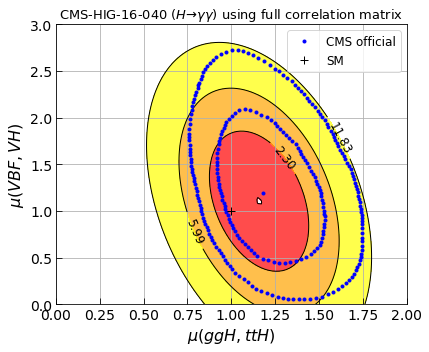

In [27]:
# --- now make 2d plot of mu(ggH+ttH) vs mu(VBF+VH) ---

CLvals = [1e-3,2.3,5.99,11.83]

fig = plt.figure(figsize=(6,5))
plt.grid()
plt.contourf(xi, yi, Lxy, levels=CLvals, colors=['red','orange','yellow'], alpha=0.7)
cntrLines=plt.contour(xi, yi, Lxy, levels=CLvals, colors='black', linewidths=1)
plt.clabel(cntrLines, inline=True, fmt='%0.2f', fontsize=12)
plt.plot(expCont['cx'],expCont['cy'], '.', c='b', label='CMS official')
plt.plot([1],[1], '+', c='k', markersize=8, label='SM')
plt.xlabel(r'$\mu(ggH,ttH)$',fontsize=16)
plt.ylabel(r'$\mu(VBF,VH)$',fontsize=16)
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.title(r'CMS-HIG-16-040 ($H\to\gamma\gamma$) using full correlation matrix',fontsize=13)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
#fig.savefig('CMS-HIG-16-040_2Dmu-wcorrelations.png', dpi=300)

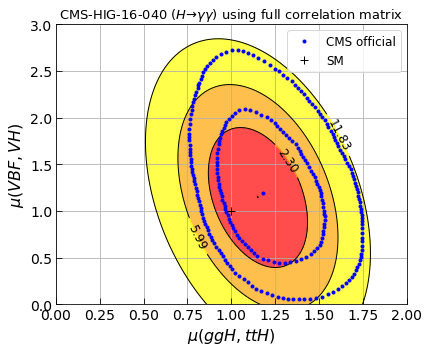

In [29]:
# --- same again, but now taking Hgamgam_BM as 'measured' values ---
# --- this is just a check, the procedure above is more accurate ---

x = np.linspace(0, 2, 100, endpoint = True)
y = np.linspace(0, 3, 100, endpoint = True)
xi, yi = np.meshgrid(x, y)

logL0 = st.multivariate_normal.logpdf(Hgamgam_BM, mean=Hgamgam_BM, cov=Hgamgam_cov)

Lxy_alt=[]
for xj,yj in zip(xi,yi):
    tmp=[]
    for x_,y_ in zip(xj,yj):
        logL1 = st.multivariate_normal.logpdf(Hgamgam_BM, mean=np.array([x_,y_,y_,x_]), cov=Hgamgam_cov)
        tmp.append(-2*(logL1-logL0))
    Lxy_alt.append(tmp)
    
CLvals = [1e-3,2.3,5.99,11.83]

fig = plt.figure(figsize=(6,5))
plt.grid()
plt.contourf(xi, yi, Lxy_alt, levels=CLvals, colors=['red','orange','yellow'], alpha=0.7)
cntrLines=plt.contour(xi, yi, Lxy, levels=CLvals, colors='black', linewidths=1)
plt.clabel(cntrLines, inline=True, fmt='%0.2f', fontsize=12)
plt.plot(expCont['cx'],expCont['cy'], '.', c='b', label='CMS official')
plt.plot([1],[1], '+', c='k', markersize=8, label='SM')
plt.xlabel(r'$\mu(ggH,ttH)$',fontsize=16)
plt.ylabel(r'$\mu(VBF,VH)$',fontsize=16)
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.title(r'CMS-HIG-16-040 ($H\to\gamma\gamma$) using full correlation matrix',fontsize=13)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
#fig.savefig('CMS-HIG-16-040_2Dmu-wcorrelations-alt.png', dpi=300)

## ATLAS-HIGGS-2016-21

In [42]:
# --- experimental input from Fig. 12 ---
# --- order: ggH, VBF, VH, ttH ---

Hgamgam_obs = np.array([0.81,2.0,0.7,0.5])
Hgamgam_err_pos = np.array([[0.19,0.6,0.9,0.6]])
Hgamgam_err_neg = np.array([[0.18,0.5,0.8,0.6]])
#Hgamgam_err = (Hgamgam_err_pos+Hgamgam_err_neg)/2
Hgamgam_err = Hgamgam_err_pos  # need symmetric errors; averaging doesn't give good result so take larger value

In [43]:
# --- correlation matrix from Fig. 40a ---

Hgamgam_corr = np.array([[1,-0.27,-0.27,0.04],
                   [-0.27,1,0.02,0.01],
                   [-0.27,0.02,1,-0.1],
                   [0.04,0.01,-0.1,1]])
print(Hgamgam_corr)

[[ 1.   -0.27 -0.27  0.04]
 [-0.27  1.    0.02  0.01]
 [-0.27  0.02  1.   -0.1 ]
 [ 0.04  0.01 -0.1   1.  ]]


In [44]:
# --- compute covariance matrix ---

Hgamgam_cov = Hgamgam_err*Hgamgam_corr*Hgamgam_err.T
print(Hgamgam_cov)

[[ 0.0361  -0.03078 -0.04617  0.00456]
 [-0.03078  0.36     0.0108   0.0036 ]
 [-0.04617  0.0108   0.81    -0.054  ]
 [ 0.00456  0.0036  -0.054    0.36   ]]


In [45]:
# --- ggH+ttH and VBF+VH best fits as weighted means like in CMS ---
# --- nb: just for info, not used further bewlow ---

w0 = 1/Hgamgam_err[0][0]**2
w1 = 1/Hgamgam_err[0][1]**2
w2 = 1/Hgamgam_err[0][2]**2
w3 = 1/Hgamgam_err[0][3]**2

ggH_best = (w0*Hgamgam_obs[0] + w3*Hgamgam_obs[3])/(w0+w3)
VVH_best = (w1*Hgamgam_obs[1] + w2*Hgamgam_obs[2])/(w1+w2)

print('ggH+ttH mean = ', ggH_best)
print('VBF+VH mean =  ', VVH_best)

ggH+ttH mean =  0.7817470335773795
VBF+VH mean =   1.6


In [46]:
# --- Test: -2 log Like at 1d best fit and for SM ---

print('chi^2(1d-obs) = ', -2*st.multivariate_normal.logpdf(Hgamgam_obs, mean=Hgamgam_obs, cov=Hgamgam_cov))
print('chi^2(SM) = ', -2*st.multivariate_normal.logpdf(Hgamgam_obs, mean=[1,1,1,1], cov=Hgamgam_cov))

chi^2(1d-obs) =  1.610869164868232
chi^2(SM) =  5.78455883354452


In [47]:
# --- define chi^2(mu_ggH, mu_VBF) function as -2 log L1/L0     ---
# --- mu(VBF) and mu(ttH) are fixed to observed best fit values ---

def chi2Gamgam(x,y):
    logL0 = st.multivariate_normal.logpdf(Hgamgam_obs, mean=Hgamgam_obs, cov=Hgamgam_cov)
    logL1 = st.multivariate_normal.logpdf(Hgamgam_obs, mean=np.array([x,y,Hgamgam_obs[2],Hgamgam_obs[3]]), cov=Hgamgam_cov)
    return -2*(logL1-logL0)

In [48]:
# --- make 2d chi^2 map for mu(ggH) vs mu(VBF) ---

x = np.linspace(0, 2, 100, endpoint = True)
y = np.linspace(0, 4, 100, endpoint = True)
xi, yi = np.meshgrid(x, y)

Lxy=[]
for xj,yj in zip(xi,yi):
    tmp=[]
    for x_,y_ in zip(xj,yj):
        tmp.append(chi2Gamgam(x_,y_))
    Lxy.append(tmp)

In [49]:
# --- read digitized 2d exp. contours for valdation, from Loc ---

os.chdir('/Users/kraml/Programs/Lilith-1.2.beta/validation/ATLAS/HIGG-2016-21')
dt = np.dtype([('cx', float), ('cy', float)])
expCont = np.genfromtxt('HIGG-2016-21_2d_mu_contour.txt', dtype=dt)

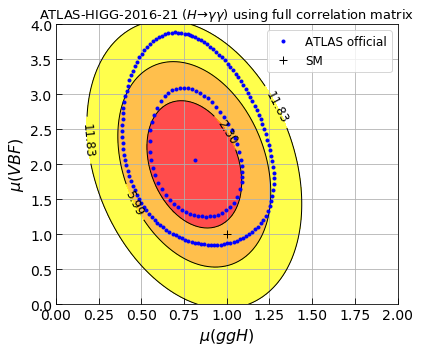

In [50]:
# --- now make 2d plot of mu(ggH) vs mu(VBF) ---

CLvals = [0,2.3,5.99,11.83]

fig = plt.figure(figsize=(6,5))
plt.grid()
plt.contourf(xi, yi, Lxy, levels=CLvals, colors=['red','orange','yellow'], alpha=0.7)
cntrLines=plt.contour(xi, yi, Lxy, levels=CLvals, colors='black', linewidths=1)
plt.clabel(cntrLines, inline=True, fmt='%0.2f', fontsize=12)
plt.plot(expCont['cx'],expCont['cy'], '.', c='b', label='ATLAS official')
plt.plot([1],[1], '+', c='k', markersize=8, label='SM')
plt.xlabel(r'$\mu(ggH)$',fontsize=16)
plt.ylabel(r'$\mu(VBF)$',fontsize=16)
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.title(r'ATLAS-HIGG-2016-21 ($H\to\gamma\gamma$) using full correlation matrix',fontsize=13)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
#fig.savefig('ATLAS-HIGG-2016-21_2Dmu-wcorrelations.png', dpi=300)